# 01. Import libraries & data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline

In [3]:
#Define path
path = r'C:\Users\astat\Documents\Final project'

In [4]:
#Import data
crime_police = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'crime_police_cleaned3.pkl'))

In [5]:
crime_police.head()

,Staff_area_name,crime_area,Geo_boundries_Data_match,number_residents,number_police,year,police_per_1000,number_spc,id,date,...,crime_type,outcome_cat,month,number_crimes,crime_per_officer,crime_per_residents,crime,area_size,pop_density,urban
0,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,0,2020-01,...,14,24.0,1,27252,5.099551,11.683601,Violence & damage,2029.0,1149.581074,0
1,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,1,2020-01,...,8,10.0,1,27252,5.099551,11.683601,Weapons & Drugs,2029.0,1149.581074,0
2,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,2,2020-01,...,2,10.0,1,27252,5.099551,11.683601,Theft,2029.0,1149.581074,0
3,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,3,2020-01,...,3,10.0,1,27252,5.099551,11.683601,Theft,2029.0,1149.581074,0
4,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,4,2020-01,...,4,10.0,1,27252,5.099551,11.683601,Violence & damage,2029.0,1149.581074,0


In [6]:
crime_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18362528 entries, 0 to 7893406
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Staff_area_name           object 
 1   crime_area                int8   
 2   Geo_boundries_Data_match  object 
 3   number_residents          float32
 4   number_police             float16
 5   year                      int16  
 6   police_per_1000           float16
 7   number_spc                float16
 8   id                        int32  
 9   date                      object 
 10  reported                  int8   
 11  lsoa_code                 object 
 12  lsoa_name                 object 
 13  crime_type                int8   
 14  outcome_cat               float16
 15  month                     int8   
 16  number_crimes             int32  
 17  crime_per_officer         float32
 18  crime_per_residents       float32
 19  crime                     object 
 20  area_size              

# 02. Wrangle data

In [7]:
#create subset with only date and number_crime
crime_police_time = crime_police[['number_crimes', 
                                  'date']]

In this analysis I am interested in the change in number of crimes over the period prior and during the Covid lockdowns in England and Wales and am keeping early data points from 2019 as control.

In [8]:
#sort by date
crime_police_time=crime_police_time.sort_values(by='date')

In [9]:
crime_police_time.head()

,number_crimes,date
3719887,6611,2018-10
3548162,8194,2018-10
3548161,8194,2018-10
3548160,8194,2018-10
3548159,8194,2018-10


In [10]:
from datetime import datetime

crime_police_time['datetime'] = pd.to_datetime(crime_police_time['date']) # Create a datetime column from "Date.""
crime_police_time = crime_police_time.set_index('datetime') # Set the datetime as the index of the dataframe.
crime_police_time.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
crime_police_time.head()

,number_crimes
datetime,
2018-10-01,6611
2018-10-01,8194
2018-10-01,8194
2018-10-01,8194
2018-10-01,8194


In [11]:
#remove duplicates
crime_police_time_duplicates = crime_police_time[crime_police_time.duplicated()]

In [12]:
print(crime_police_time_duplicates)

            number_crimes
datetime                 
2018-10-01           8194
2018-10-01           8194
2018-10-01           8194
2018-10-01           8194
2018-10-01           8194
...                   ...
2021-09-01           4739
2021-09-01           4739
2021-09-01           4739
2021-09-01           4739
2021-09-01          17303

[18361081 rows x 1 columns]


In [13]:
#Creating subset without duplicates
crime_police_time_clean = crime_police_time.drop_duplicates()

In [14]:
crime_police_time_clean.head()

,number_crimes
datetime,
2018-10-01,6611
2018-10-01,8194
2018-10-01,6705
2018-10-01,16211
2018-10-01,5058


In [15]:
#Sum crime per month across areas
crime_police_time_clean['total_crime'] = crime_police_time_clean.groupby('datetime')['number_crimes'].transform('sum')

In [16]:
crime_police_time_clean.head()

,number_crimes,total_crime
datetime,,
2018-10-01,6611,564170
2018-10-01,8194,564170
2018-10-01,6705,564170
2018-10-01,16211,564170
2018-10-01,5058,564170


In [17]:
#Drop crime_area and number_crimes
crime_police_time_clean=crime_police_time_clean.drop(columns=['number_crimes'])

In [18]:
crime_police_time_clean.head()

,total_crime
datetime,
2018-10-01,564170
2018-10-01,564170
2018-10-01,564170
2018-10-01,564170
2018-10-01,564170


In [19]:
#Creating subset without duplicates
crime_time = crime_police_time_clean.drop_duplicates()

In [20]:
crime_time.head()

,total_crime
datetime,
2018-10-01,564170
2018-11-01,531526
2018-12-01,494677
2019-01-01,499324
2019-02-01,493306


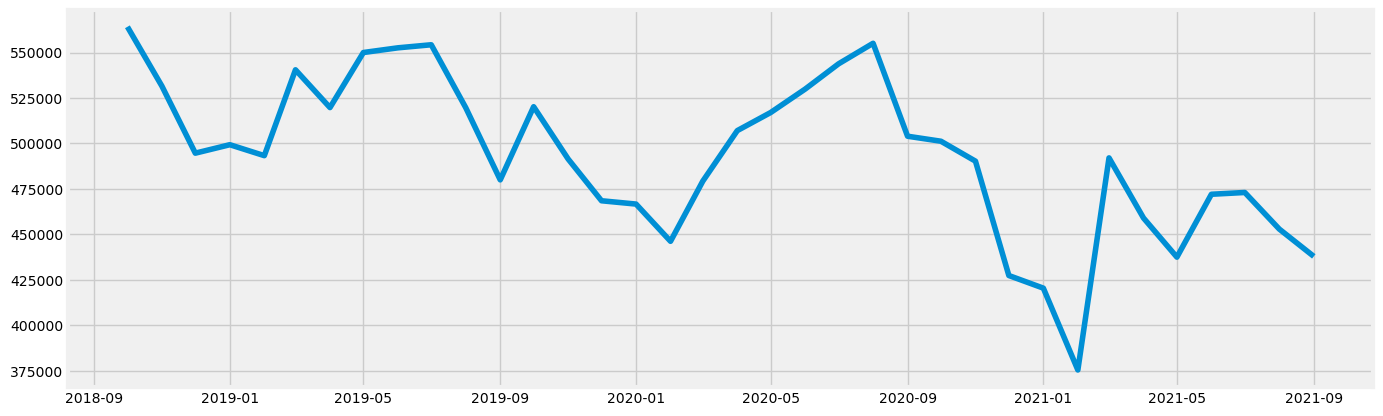

In [21]:
#Plot total_crime over time
plt.figure(figsize=(15,5), dpi=100)
plt.plot(crime_time)

# 03. Time series analysis

In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(crime_time, model='additive')

In [23]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

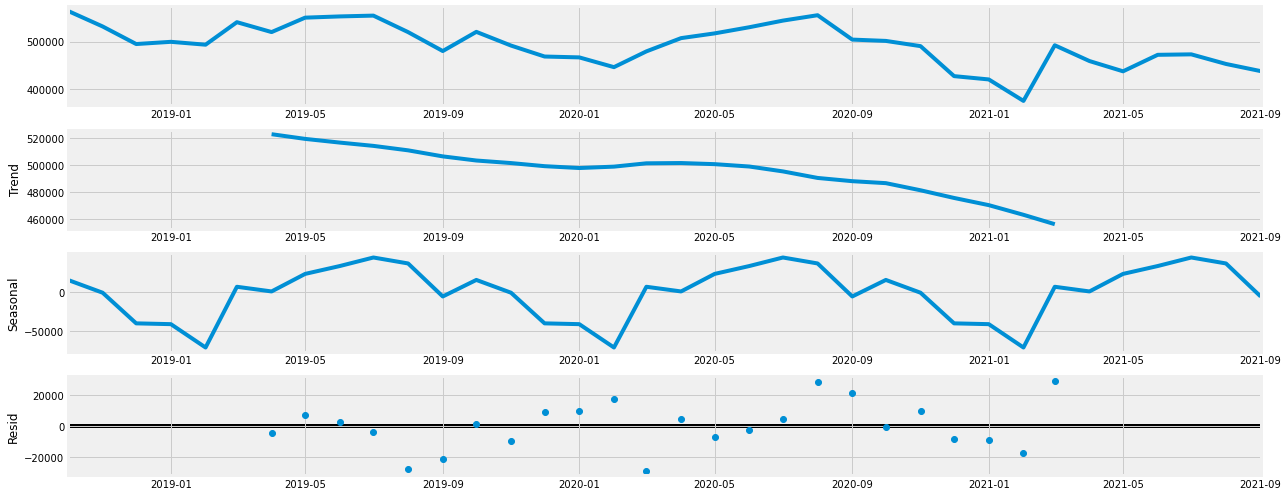

In [24]:
# Plot the separate components

decomposition.plot()
plt.savefig(os.path.join(path, 'Analysis','Visualisations', 'time_components.png'))
plt.show()

There is strong seasonality present in the number of crimes Where crimes are down over the winter months and are highest around spring summer, when people spend more time outside. As well as an overall downward trend, which could be explained by the 2 lockdowns in spring 2020 and winter 2021, which matches the residual noise around March and August 2020 as well as early 2021. 

# 04. Testing for stationarity

In [26]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(crime_time['total_crime'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.613256
p-value                         0.090288
Number of Lags Used             0.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


The null hypothesis (that there is a unit root and therefore no stationarity in the data) can be rejected at 90% confidence interval. The data can therefore be assumed to be stationary and no further steps are necessary.

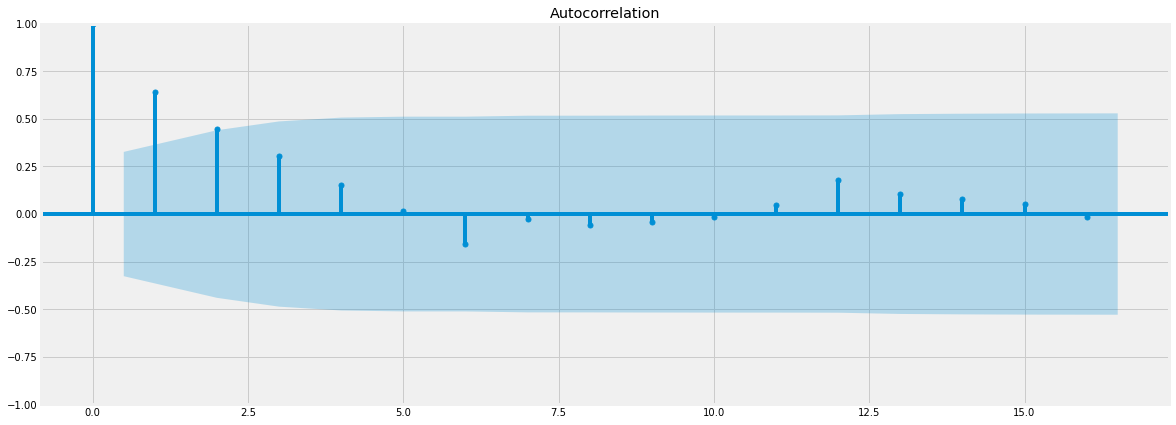

In [27]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(crime_time)
plt.show()

In [28]:
crime_time.to_csv(os.path.join(path, 'Data','Prepared Data', 'crime_time.csv')) 